<a href="https://colab.research.google.com/github/1273474/flipkart-ba-churn-project/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1.A: Install Necessary Libraries ---
# We install the libraries that are not pre-installed on Colab.
!pip install kaggle
!pip install causalml
!pip install econml
!pip install shap

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # This helps in finding file paths
import os
import zipfile

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility.
# This ensures that every time we run the code, we get the same "random" results.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Libraries installed and imported successfully.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.49.1
    Uninstalling shap-0.49.1:
      Successfully uninstalled shap-0.49.1
Libraries installed and imported successfully.


In [5]:
# --- 1.B.2: Upload Kaggle API Key ---
# This code will open an upload dialog.
# Please upload the 'kaggle.json' file you just downloaded.

from google.colab import files

print("Please upload your kaggle.json file:")
files.upload()

print("File uploaded.")

Please upload your kaggle.json file:


Saving kaggle (1).json to kaggle (1) (1).json
File uploaded.


In [8]:
# --- 1.B.3: Download and Unzip the Olist Dataset (Corrected) ---

# Set up the Kaggle directory
!mkdir -p ~/.kaggle

# --- THIS IS THE FIX ---
# Move the renamed file "kaggle (1).json" to the correct location
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
# --- END OF FIX ---

!chmod 600 ~/.kaggle/kaggle.json

print("Downloading Olist dataset from Kaggle...")
# This is the API command for the dataset
!kaggle datasets download -d olistbr/brazilian-ecommerce

print("Download complete. Unzipping files...")
# -o flag will overwrite existing files without asking
!unzip -o brazilian-ecommerce.zip -d data

print("All files unzipped into the 'data' folder.")

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.31GB/s]
Download complete. Unzipping files...
Archive:  brazilian-ecommerce.zip
  inflating: data/olist_customers_dataset.csv  
  inflating: data/olist_geolocation_dataset.csv  
  inflating: data/olist_order_items_dataset.csv  
  inflating: data/olist_order_payments_dataset.csv  
  inflating: data/olist_order_reviews_dataset.csv  
  inflating: data/olist_orders_dataset.csv  
  inflating: data/olist_products_dataset.csv  
  inflating: data/olist_sellers_dataset.csv  
  inflating: data/product_category_name_translation.csv  
All files unzipped into the 'data' folder.


In [9]:
# --- 1.B.4: Load all CSV files into a dictionary of DataFrames ---

# Define the path to our data folder
data_path = 'data/'

# Get a list of all csv files in the data folder
all_files = glob.glob(os.path.join(data_path, "*.csv"))

# Create a dictionary to hold our dataframes
# The key will be the file name (e.g., 'olist_orders_dataset')
# The value will be the actual pandas DataFrame
data = {}

print("Loading files...")
for f in all_files:
    # Get the file name from the path
    file_name = os.path.basename(f).replace('.csv', '')

    # Read the csv file into a DataFrame and store it in our dictionary
    data[file_name] = pd.read_csv(f)
    print(f"Loaded: {file_name}")

print("\n--- All Data Loaded Successfully ---")
# Let's check the keys (our table names)
print("Available tables:", data.keys())

# Let's inspect the 'orders' table as an example
print("\n--- Example: 'olist_orders_dataset' head ---")
print(data['olist_orders_dataset'].head())

Loading files...
Loaded: olist_order_payments_dataset
Loaded: olist_order_items_dataset
Loaded: olist_geolocation_dataset
Loaded: olist_sellers_dataset
Loaded: olist_order_reviews_dataset
Loaded: olist_orders_dataset
Loaded: product_category_name_translation
Loaded: olist_customers_dataset
Loaded: olist_products_dataset

--- All Data Loaded Successfully ---
Available tables: dict_keys(['olist_order_payments_dataset', 'olist_order_items_dataset', 'olist_geolocation_dataset', 'olist_sellers_dataset', 'olist_order_reviews_dataset', 'olist_orders_dataset', 'product_category_name_translation', 'olist_customers_dataset', 'olist_products_dataset'])

--- Example: 'olist_orders_dataset' head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44d

# Step 1.C: Data Dictionary

This document outlines the schema and business meaning of the key tables used in this project.

| File Name | Purpose | Key Columns (and what they mean) |
| :--- | :--- | :--- |
| **`olist_customers_dataset`** | Holds customer information. | `customer_id`: Key for this table (links to `orders`). <br> `customer_unique_id`: The *true* ID for a customer (one customer can have multiple `customer_id`s for different orders). <br> `customer_zip_code_prefix`: Location of the customer. |
| **`olist_orders_dataset`** | The main table, lists all orders. | `order_id`: The unique ID for an order. **This is our main key.** <br> `customer_id`: Links to the `customers` table. <br> `order_status`: (e.g., 'delivered', 'shipped', 'canceled'). <br> `order_purchase_timestamp`: When the order was placed. |
| **`olist_order_items_dataset`** | Connects orders to products. | `order_id`: Links to the `orders` table. <br> `product_id`: Links to the `products` table. <br> `seller_id`: Links to the `sellers` table. <br> `price`: The price of the item. <br> `freight_value`: The shipping cost. |
| **`olist_order_payments_dataset`** | Contains all payment information. | `order_id`: Links to the `orders` table. <br> `payment_type`: (e.g., 'credit_card', 'boleto'). <br> `payment_value`: Total value of the payment. |
| **`olist_order_reviews_dataset`** | Contains customer reviews. | `order_id`: Links to the `orders` table. <br> `review_score`: The rating (1 to 5). **Key driver for churn.** <br> `review_comment_message`: (Text data, advanced step). |
| **`olist_products_dataset`** | Contains product information. | `product_id`: Links to `order_items`. <br> `product_category_name`: (e.g., 'beleza_saude', 'informatica_acessorios'). |
| **`olist_sellers_dataset`** | Contains seller information. | `seller_id`: Links to `order_items`. <br> `seller_zip_code_prefix`: Location of the seller. |
| **`product_category_name_translation`** | Translates category names. | `product_category_name`: The Portuguese name. <br> `product_category_name_english`: The English name. |

In [10]:
# --- Step 2.A: High-Level Statistics ---
print("--- Starting Step 2: Exploratory Data Analysis ---")

# First, let's see how many orders we actually have.
print(f"Total rows in orders table: {len(data['olist_orders_dataset'])}")

# But how many unique orders?
print(f"Total unique orders: {data['olist_orders_dataset']['order_id'].nunique()}")

# Now, the big one: how many unique *customers*?
# I need to use 'customer_unique_id' from the customers table for this.
print(f"Total unique customers: {data['olist_customers_dataset']['customer_unique_id'].nunique()}")

# Let's also check the number of products and sellers.
print(f"Total products: {data['olist_products_dataset']['product_id'].nunique()}")
print(f"Total sellers: {data['olist_sellers_dataset']['seller_id'].nunique()}")

--- Starting Step 2: Exploratory Data Analysis ---
Total rows in orders table: 99441
Total unique orders: 99441
Total unique customers: 96096
Total products: 32951
Total sellers: 3095


In [11]:
print("\n--- Understanding the Time Range and Order Status ---")

# I need to convert the purchase timestamp to datetime objects to work with them.
# I'll make a copy to avoid a SettingWithCopyWarning, which is an annoying pandas thing.
orders_df = data['olist_orders_dataset'].copy()

# Converting the timestamp column to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Let's find the first and last order dates
min_date = orders_df['order_purchase_timestamp'].min()
max_date = orders_df['order_purchase_timestamp'].max()

print(f"Data ranges from: {min_date} to {max_date}")
print(f"Total time span: {(max_date - min_date).days} days")

print("\n--- Understanding Order Status ---")
# What's the breakdown of order statuses? This is key for data cleaning.
# I probably only want to analyze 'delivered' orders.
# Canceled or unavailable orders aren't useful for a churn model.
status_counts = orders_df['order_status'].value_counts(normalize=True) * 100

print("Order Status (Percentage):")
print(status_counts)

# That 'delivered' percentage looks high, which is good.
# For the rest of the project, I'll make a note to filter for 'delivered' orders.


--- Understanding the Time Range and Order Status ---
Data ranges from: 2016-09-04 21:15:19 to 2018-10-17 17:30:18
Total time span: 772 days

--- Understanding Order Status ---
Order Status (Percentage):
order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


### Step 2.B: Problem Framing - Defining 'Churn'

This is the most critical business definition for this project.

This isn't a subscription service like Netflix, so churn is tricky. A customer doesn't "cancel" a subscription; they just... stop buying.

I need to define a time window. If a customer doesn't buy within this window, I'll label them as 'churned'.

**My Initial Churn Definition:**
A customer is considered **churned** if they do not make another purchase within **90 days** of their last purchase.

**Why 90 days?**
It's a common business standard (a full quarter). This is a strong, defensible assumption to start with. Later, in Step 3, I can actually analyze the *average time between purchases* to see if 90 days is a good number, but for now, this sets our target.

**Snapshot Date:**
To calculate this, I'll need a "snapshot" or "reference" date. I will set this as the day after the last order in the dataset.
* Last Order Date: `2018-10-17` (from the code above)
* My Snapshot Date: `2018-10-18`

### Step 2.C: Problem Framing - Defining Success

If my model works, how do I prove it's valuable to the business? I need to define the Key Performance Indicators (KPIs) we want to improve.

**1. Primary Metric: 30-Day Incremental Revenue**
This is the *real* goal. It's not just about stopping churn; it's about generating *more revenue* (or stopping revenue loss) than the cost of our intervention. The uplift model in a later step will be key to optimizing this.

**2. Secondary Metric (Guardrail): Average Order Value (AOV)**
When I send a 20% off coupon, I need to make sure customers don't just start buying smaller, less profitable items. I'll need to track AOV to make sure our intervention isn't accidentally hurting profit.

**3. Model Metric: Precision@100**
For the model itself, I don't care as much about overall accuracy. I care about the *top 100* customers my model flags. 'Precision@100' will tell me: "Of the top 100 customers my model *said* would churn, how many *actually* did?" This is a very practical metric that a marketing team can use.

In [12]:
# --- Step 3.A: Merging All DataFrames ---
print("--- Starting Step 3: Data Merging & Feature Engineering ---")

# We'll merge all the tables together.
# 1. Start with 'orders' and 'customers'
merged_df = pd.merge(
    data['olist_orders_dataset'],
    data['olist_customers_dataset'],
    on='customer_id',
    how='left' # Keep all orders, even if customer info is missing (though unlikely)
)

# 2. Add 'order_items'
# One order can have multiple items, so this will make the table longer
merged_df = pd.merge(
    merged_df,
    data['olist_order_items_dataset'],
    on='order_id',
    how='left'
)

# 3. Add 'order_payments'
merged_df = pd.merge(
    merged_df,
    data['olist_order_payments_dataset'],
    on='order_id',
    how='left'
)

# 4. Add 'order_reviews'
merged_df = pd.merge(
    merged_df,
    data['olist_order_reviews_dataset'],
    on='order_id',
    how='left'
)

# 5. Add 'products' to get category names
merged_df = pd.merge(
    merged_df,
    data['olist_products_dataset'],
    on='product_id',
    how='left'
)

# 6. Add 'product_category_name_translation' to get English names
merged_df = pd.merge(
    merged_df,
    data['product_category_name_translation'],
    on='product_category_name',
    how='left'
)


print(f"Original merged data shape: {merged_df.shape}")

# Let's inspect the new master table
print("\n--- Master Merged DataFrame Head ---")
print(merged_df.head())

--- Starting Step 3: Data Merging & Feature Engineering ---
Original merged data shape: (119143, 37)

--- Master Merged DataFrame Head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_

In [13]:
# --- Step 3.B: Cleaning the Master Table ---

# 1. Filter for 'delivered' orders only
# As we decided in Step 2, we can't analyze canceled or unavailable orders.
master_df = merged_df[merged_df['order_status'] == 'delivered'].copy()
print(f"Shape after filtering for 'delivered' orders: {master_df.shape}")

# 2. Convert timestamp columns to datetime objects
# This is crucial for calculating recency and other time-based features.
time_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_estimated_delivery_date',
    'order_delivered_customer_date'
]

print("\nConverting timestamp columns...")
for col in time_cols:
    master_df[col] = pd.to_datetime(master_df[col], errors='coerce') # 'coerce' will handle any errors

# 3. Handle key missing values
# For product_category_name_english, let's fill missing values with 'unknown'
master_df['product_category_name_english'] = master_df['product_category_name_english'].fillna('unknown')

# 4. Drop duplicate rows (if any)
# This can happen during merges, so it's good practice.
master_df = master_df.drop_duplicates()
print(f"Shape after dropping duplicates: {master_df.shape}")

# Let's check the dtypes and info
print("\n--- Cleaned Master DataFrame Info ---")
master_df.info()

Shape after filtering for 'delivered' orders: (115723, 37)

Converting timestamp columns...
Shape after dropping duplicates: (115723, 37)

--- Cleaned Master DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 115723 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   customer_id                    115723 non-null  object        
 2   order_status                   115723 non-null  object        
 3   order_purchase_timestamp       115723 non-null  datetime64[ns]
 4   order_approved_at              115708 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115721 non-null  datetime64[ns]
 6   order_delivered_customer_date  115715 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115723 non-null  datetime64[ns]
 8   customer_unique_id             1

In [86]:
# # # # --- Step 3.C (Revised): Point-in-Time Feature Engineering ---

# # # print("\n--- (Revised) Engineering Point-in-Time Features ---")

# # # # 1. Define our "Prediction Date" (Snapshot Date)
# # # # We will pretend it is this date, and we want to predict the future.
# # # # Let's pick a date 3 months before the end of the dataset.
# # # snapshot_date = pd.to_datetime('2018-07-01')
# # # print(f"Snapshot Date for all feature calculation: {snapshot_date}")

# # # # 2. Filter our master_df for *only* data before the snapshot date
# # # # We can't use any data from the future to build our features.
# # # master_df_past = master_df[master_df['order_purchase_timestamp'] < snapshot_date].copy()
# # # print(f"Using {len(master_df_past)} records from before {snapshot_date} to build features.")


# # # # 3. Group by customer
# # # # We create our customer-level feature DataFrame.
# # # # We'll group by 'customer_unique_id'.
# # # customer_features = master_df_past.groupby('customer_unique_id').agg(
# # #     # Get the most recent purchase *before* the snapshot date
# # #     last_purchase_date=('order_purchase_timestamp', 'max')
# # # ).reset_index()


# # # # --- 4. Engineer RFM Features (as of snapshot_date) ---

# # # # [R] Recency: How many days *before the snapshot date* was their last purchase?
# # # customer_features['recency'] = (snapshot_date - customer_features['last_purchase_date']).dt.days

# # # # [F] Frequency: How many total orders have they placed *before* the snapshot date?
# # # frequency_df = master_df_past.groupby('customer_unique_id')['order_id'].nunique().reset_index()
# # # frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)

# # # customer_features = pd.merge(customer_features, frequency_df, on='customer_unique_id', how='left')

# # # # [M] Monetary: How much total money have they spent *before* the snapshot date?
# # # monetary_df = master_df_past.groupby('customer_unique_id')['payment_value'].sum().reset_index()
# # # monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)

# # # customer_features = pd.merge(customer_features, monetary_df, on='customer_unique_id', how='left')


# # # # --- 5. Engineer Other Behavioral Features (as of snapshot_date) ---

# # # # Average Review Score (from past orders)
# # # review_df = master_df_past.groupby('customer_unique_id')['review_score'].mean().reset_index()
# # # review_df.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
# # # customer_features = pd.merge(customer_features, review_df, on='customer_unique_id', how='left')

# # # # Average Number of Payment Installments (from past orders)
# # # installments_df = master_df_past.groupby('customer_unique_id')['payment_installments'].mean().reset_index()
# # # installments_df.rename(columns={'payment_installments': 'avg_installments'}, inplace=True)
# # # customer_features = pd.merge(customer_features, installments_df, on='customer_unique_id', how='left')

# # # # Average Freight Value (from past orders)
# # # freight_df = master_df_past.groupby('customer_unique_id')['freight_value'].mean().reset_index()
# # # freight_df.rename(columns={'freight_value': 'avg_freight_value'}, inplace=True)
# # # customer_features = pd.merge(customer_features, freight_df, on='customer_unique_id', how='left')

# # # # Total number of items purchased (from past orders)
# # # items_df = master_df_past.groupby('customer_unique_id')['order_item_id'].count().reset_index()
# # # items_df.rename(columns={'order_item_id': 'total_items'}, inplace=True)
# # # customer_features = pd.merge(customer_features, items_df, on='customer_unique_id', how='left')

# # # # Most frequent product category (from past orders)
# # # def get_most_frequent(x):
# # #     try:
# # #         return x.value_counts().index[0]
# # #     except:
# # #         return 'unknown'

# # # category_df = master_df_past.groupby('customer_unique_id')['product_category_name_english'].apply(get_most_frequent).reset_index()
# # # category_df.rename(columns={'product_category_name_english': 'favorite_category'}, inplace=True)
# # # customer_features = pd.merge(customer_features, category_df, on='customer_unique_id', how='left')


# # # # Let's inspect our new feature table
# # # print("\n--- Final Customer Features Table Head (Point-in-Time) ---")
# # # # Note: all data here is from *before* 2018-07-01
# # # print(customer_features.head())



# # # --- Step 3.C (FIXED - Active Cohort): Point-in-Time Feature Engineering ---

# # print("\n--- (FIXED) Engineering Features for ACTIVE COHORT ---")

# # # 1. Define our time windows
# # snapshot_date = pd.to_datetime('2018-07-01')
# # activity_window_days = 180  # How far back to look for "active" customers
# # activity_start_date = snapshot_date - pd.Timedelta(days=activity_window_days)

# # print(f"Snapshot Date: {snapshot_date}")
# # print(f"Activity Window: {activity_start_date} to {snapshot_date}")

# # # 2. Get the list of "Active Customers"
# # # These are customers who made *at least one purchase* inside our 180-day activity window.
# # active_customers = master_df[
# #     (master_df['order_purchase_timestamp'] >= activity_start_date) &
# #     (master_df['order_purchase_timestamp'] < snapshot_date)
# # ]['customer_unique_id'].unique()

# # print(f"Found {len(active_customers)} recently active customers.")

# # # 3. Filter our "past" data for *only* these active customers
# # # We will build features for these customers using their *entire* history.
# # master_df_past = master_df[
# #     (master_df['customer_unique_id'].isin(active_customers)) &
# #     (master_df['order_purchase_timestamp'] < snapshot_date)
# # ].copy()

# # print(f"Building features for these customers using {len(master_df_past)} total past records.")

# # # 4. Group by customer
# # # We create our customer-level feature DataFrame.
# # customer_features = master_df_past.groupby('customer_unique_id').agg(
# #     last_purchase_date=('order_purchase_timestamp', 'max')
# # ).reset_index()


# # # --- 5. Engineer RFM Features (as of snapshot_date) ---

# # # [R] Recency: How many days *before the snapshot date* was their last purchase?
# # customer_features['recency'] = (snapshot_date - customer_features['last_purchase_date']).dt.days

# # # [F] Frequency: How many total orders have they placed *before* the snapshot date?
# # frequency_df = master_df_past.groupby('customer_unique_id')['order_id'].nunique().reset_index()
# # frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)
# # customer_features = pd.merge(customer_features, frequency_df, on='customer_unique_id', how='left')

# # # [M] Monetary: How much total money have they spent *before* the snapshot date?
# # monetary_df = master_df_past.groupby('customer_unique_id')['payment_value'].sum().reset_index()
# # monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)
# # customer_features = pd.merge(customer_features, monetary_df, on='customer_unique_id', how='left')


# # # --- 6. Engineer Other Behavioral Features (as of snapshot_date) ---

# # # Average Review Score (from past orders)
# # review_df = master_df_past.groupby('customer_unique_id')['review_score'].mean().reset_index()
# # review_df.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
# # customer_features = pd.merge(customer_features, review_df, on='customer_unique_id', how='left')

# # # Average Number of Payment Installments (from past orders)
# # installments_df = master_df_past.groupby('customer_unique_id')['payment_installments'].mean().reset_index()
# # installments_df.rename(columns={'payment_installments': 'avg_installments'}, inplace=True)
# # customer_features = pd.merge(customer_features, installments_df, on='customer_unique_id', how='left')

# # # Average Freight Value (from past orders)
# # freight_df = master_df_past.groupby('customer_unique_id')['freight_value'].mean().reset_index()
# # freight_df.rename(columns={'freight_value': 'avg_freight_value'}, inplace=True)
# # customer_features = pd.merge(customer_features, freight_df, on='customer_unique_id', how='left')

# # # Total number of items purchased (from past orders)
# # items_df = master_df_past.groupby('customer_unique_id')['order_item_id'].count().reset_index()
# # items_df.rename(columns={'order_item_id': 'total_items'}, inplace=True)
# # customer_features = pd.merge(customer_features, items_df, on='customer_unique_id', how='left')

# # # Most frequent product category (from past orders)
# # def get_most_frequent(x):
# #     try:
# #         return x.value_counts().index[0]
# #     except:
# #         return 'unknown'

# # category_df = master_df_past.groupby('customer_unique_id')['product_category_name_english'].apply(get_most_frequent).reset_index()
# # category_df.rename(columns={'product_category_name_english': 'favorite_category'}, inplace=True)
# # customer_features = pd.merge(customer_features, category_df, on='customer_unique_id', how='left')


# # # Let's inspect our new feature table
# # print("\n--- Final 'Active Cohort' Customer Features Table Head ---")
# # print(customer_features.head())
# # print(f"Total customers in our active cohort: {len(customer_features)}")

# # --- Step 3.C (FINAL REVISION): Cohort-Based Feature Engineering ---
# print("\n--- (FINAL REVISION) Engineering Features for '2017 Active' Cohort ---")

# # 1. Define our time windows
# # We'll build features for all customers active in 2017.
# snapshot_date = pd.to_datetime('2018-01-01')
# activity_start_date = pd.to_datetime('2017-01-01')
# activity_end_date = pd.to_datetime('2017-12-31 23:59:59')

# print(f"Snapshot Date (Features before): {snapshot_date}")
# print(f"Activity Window (Who to study): {activity_start_date} to {activity_end_date}")

# # 2. Get the list of "Active 2017 Customers"
# active_customers = master_df[
#     (master_df['order_purchase_timestamp'] >= activity_start_date) &
#     (master_df['order_purchase_timestamp'] <= activity_end_date)
# ]['customer_unique_id'].unique()

# print(f"Found {len(active_customers)} customers active in 2017.")

# # 3. Filter our "past" data for *only* these 2017 customers
# # We'll build features for them using only their 2017 activity.
# master_df_past = master_df[
#     (master_df['customer_unique_id'].isin(active_customers)) &
#     (master_df['order_purchase_timestamp'] < snapshot_date)
# ].copy()

# print(f"Building features for this cohort using {len(master_df_past)} total 2017 records.")

# # 4. Group by customer
# customer_features = master_df_past.groupby('customer_unique_id').agg(
#     last_purchase_date=('order_purchase_timestamp', 'max')
# ).reset_index()

# # --- 5. Engineer RFM Features (as of snapshot_date) ---
# # We calculate recency *relative to the snapshot date*
# customer_features['recency'] = (snapshot_date - customer_features['last_purchase_date']).dt.days

# frequency_df = master_df_past.groupby('customer_unique_id')['order_id'].nunique().reset_index()
# frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)
# customer_features = pd.merge(customer_features, frequency_df, on='customer_unique_id', how='left')

# monetary_df = master_df_past.groupby('customer_unique_id')['payment_value'].sum().reset_index()
# monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)
# customer_features = pd.merge(customer_features, monetary_df, on='customer_unique_id', how='left')

# # --- 6. Engineer Other Behavioral Features (from 2017) ---
# review_df = master_df_past.groupby('customer_unique_id')['review_score'].mean().reset_index()
# review_df.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
# customer_features = pd.merge(customer_features, review_df, on='customer_unique_id', how='left')

# installments_df = master_df_past.groupby('customer_unique_id')['payment_installments'].mean().reset_index()
# installments_df.rename(columns={'payment_installments': 'avg_installments'}, inplace=True)
# customer_features = pd.merge(customer_features, installments_df, on='customer_unique_id', how='left')

# freight_df = master_df_past.groupby('customer_unique_id')['freight_value'].mean().reset_index()
# freight_df.rename(columns={'freight_value': 'avg_freight_value'}, inplace=True)
# customer_features = pd.merge(customer_features, freight_df, on='customer_unique_id', how='left')

# items_df = master_df_past.groupby('customer_unique_id')['order_item_id'].count().reset_index()
# items_df.rename(columns={'order_item_id': 'total_items'}, inplace=True)
# customer_features = pd.merge(customer_features, items_df, on='customer_unique_id', how='left')

# def get_most_frequent(x):
#     try:
#         return x.value_counts().index[0]
#     except:
#         return 'unknown'
# category_df = master_df_past.groupby('customer_unique_id')['product_category_name_english'].apply(get_most_frequent).reset_index()
# category_df.rename(columns={'product_category_name_english': 'favorite_category'}, inplace=True)
# customer_features = pd.merge(customer_features, category_df, on='customer_unique_id', how='left')

# print("\n--- Final '2017 Cohort' Customer Features Table Head ---")
# print(customer_features.head())
# print(f"Total customers in our 2017 cohort: {len(customer_features)}")


# --- Step 3.C (FINAL, COHORT-DRIVEN FIX): Feature Engineering ---
print("\n--- (FINAL FIX) Engineering Features for 'Active Repeat' Cohort ---")

# 1. Define our time windows
snapshot_date = pd.to_datetime('2018-01-01') # t0
lookback_start = pd.to_datetime('2017-01-01') # t0 - 365 days
print(f"Snapshot Date (Features before): {snapshot_date}")
print(f"Lookback Window (Who to study): {lookback_start} to {snapshot_date}")

# 2. Get all 2017 activity
master_df_2017 = master_df[
    (master_df['order_purchase_timestamp'] >= lookback_start) &
    (master_df['order_purchase_timestamp'] < snapshot_date)
].copy()

# 3. Find our cohort: Customers with >= 2 orders in 2017
# This is the key to solving our imbalance problem.
orders_per_customer = master_df_2017.groupby('customer_unique_id')['order_id'].nunique()
active_repeat_customers = orders_per_customer[orders_per_customer >= 2].index
print(f"Found {len(active_repeat_customers)} customers with 2 or more orders in 2017.")

# 4. Filter our 2017 data for *only* this high-value cohort
master_df_past = master_df_2017[master_df_2017['customer_unique_id'].isin(active_repeat_customers)]
print(f"Building features for this cohort using {len(master_df_past)} total 2017 records.")

# 5. Group by customer
customer_features = master_df_past.groupby('customer_unique_id').agg(
    last_purchase_date=('order_purchase_timestamp', 'max')
).reset_index()

# --- 6. Engineer Features (as of snapshot_date) ---
customer_features['recency'] = (snapshot_date - customer_features['last_purchase_date']).dt.days

frequency_df = master_df_past.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)
customer_features = pd.merge(customer_features, frequency_df, on='customer_unique_id', how='left')

monetary_df = master_df_past.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)
customer_features = pd.merge(customer_features, monetary_df, on='customer_unique_id', how='left')

review_df = master_df_past.groupby('customer_unique_id')['review_score'].mean().reset_index()
review_df.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
customer_features = pd.merge(customer_features, review_df, on='customer_unique_id', how='left')

installments_df = master_df_past.groupby('customer_unique_id')['payment_installments'].mean().reset_index()
installments_df.rename(columns={'payment_installments': 'avg_installments'}, inplace=True)
customer_features = pd.merge(customer_features, installments_df, on='customer_unique_id', how='left')

freight_df = master_df_past.groupby('customer_unique_id')['freight_value'].mean().reset_index()
freight_df.rename(columns={'freight_value': 'avg_freight_value'}, inplace=True)
customer_features = pd.merge(customer_features, freight_df, on='customer_unique_id', how='left')

items_df = master_df_past.groupby('customer_unique_id')['order_item_id'].count().reset_index()
items_df.rename(columns={'order_item_id': 'total_items'}, inplace=True)
customer_features = pd.merge(customer_features, items_df, on='customer_unique_id', how='left')

def get_most_frequent(x):
    try: return x.value_counts().index[0]
    except: return 'unknown'
category_df = master_df_past.groupby('customer_unique_id')['product_category_name_english'].apply(get_most_frequent).reset_index()
category_df.rename(columns={'product_category_name_english': 'favorite_category'}, inplace=True)
customer_features = pd.merge(customer_features, category_df, on='customer_unique_id', how='left')

print("\n--- Final 'Active Repeat Cohort' Customer Features Table Head ---")
print(customer_features.head())


--- (FINAL FIX) Engineering Features for 'Active Repeat' Cohort ---
Snapshot Date (Features before): 2018-01-01 00:00:00
Lookback Window (Who to study): 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Found 1170 customers with 2 or more orders in 2017.
Building features for this cohort using 3536 total 2017 records.

--- Final 'Active Repeat Cohort' Customer Features Table Head ---
                 customer_unique_id  last_purchase_date  recency  frequency  \
0  00cc12a6d8b578b8ebd21ea4e2ae8b27 2017-03-21 19:25:23      285          2   
1  013f4353d26bb05dc6652f1269458d8d 2017-11-28 13:30:58       33          2   
2  015557c9912277312b9073947804a7ba 2017-05-01 14:48:33      244          2   
3  01c289bb06354cdc7e6549570f20ada4 2017-12-26 21:14:43        5          2   
4  02168ea18740a0fdaaa15f11bebba5db 2017-10-09 22:05:59       83          2   

   monetary  avg_review_score  avg_installments  avg_freight_value  \
0    252.40               4.0               1.0          13.200000   
1   

In [87]:
# # # --- Step 3.D (Revised): Creating the "Future" Churn Label ---

# # # 1. Define our Churn Window (90 days)
# # CHURN_DAYS = 90
# # churn_window_start = snapshot_date
# # churn_window_end = snapshot_date + pd.Timedelta(days=CHURN_DAYS)

# # print(f"Defining churn as no purchase in the *future* window: {churn_window_start} to {churn_window_end}")

# # # 2. Get all purchases made in the "future" (our churn window)
# # future_purchases = master_df[
# #     (master_df['order_purchase_timestamp'] >= churn_window_start) &
# #     (master_df['order_purchase_timestamp'] < churn_window_end)
# # ]

# # # 3. Find customers who *did* make a purchase in the future
# # # These are our "not churned" customers (label = 0)
# # customers_who_returned = future_purchases['customer_unique_id'].unique()
# # print(f"Found {len(customers_who_returned)} customers who made a purchase in the future window.")

# # # 4. Create the label
# # # We map these lists to our 'customer_features' DataFrame
# # # If a customer is in the 'customers_who_returned' list, they are NOT churned (0).
# # # If they are NOT in the list, they ARE churned (1).
# # customer_features['is_churned'] = 1 - customer_features['customer_unique_id'].isin(customers_who_returned).astype(int)

# # # 5. Check the new, realistic churn rate
# # # This will be very imbalanced, as most people don't buy every 90 days.
# # churn_rate = customer_features['is_churned'].mean() * 100
# # print(f"\nNew, Realistic Churn Rate: {churn_rate:.2f}%")
# # print("This is a highly imbalanced dataset, which is perfect for a real-world problem.")

# # # 6. Save our final, *correct* table
# # customer_features.to_csv('analytics_base_table.csv', index=False)
# # print("\n--- Final, *CORRECTED* 'analytics_base_table.csv' created successfully! ---")

# # # Let's look at the final table with the new churn label
# # print(customer_features.head())


# # --- Step 3.D (FINAL REVISION): Creating the "2018" Churn Label ---

# # 1. Define our Churn Window (all of 2018)
# # We are asking: "Did this 2017 customer return at *any point* in 2018?"
# churn_window_start = snapshot_date # 2018-01-01
# churn_window_end = pd.to_datetime('2018-12-31 23:59:59') # End of 2018

# print(f"Defining churn as no purchase in the *entire future window*: {churn_window_start} to {churn_window_end}")

# # 2. Get all purchases made in the "future" (2018)
# # We use the *original* master_df for this.
# future_purchases = master_df[
#     (master_df['order_purchase_timestamp'] >= churn_window_start) &
#     (master_df['order_purchase_timestamp'] < churn_window_end)
# ]

# # 3. Find 2017 customers who *did* make a purchase in 2018
# customers_who_returned = future_purchases['customer_unique_id'].unique()
# print(f"Found {len(customers_who_returned)} customers who made a purchase in 2018.")

# # 4. Create the label
# # We map these lists to our 'customer_features' (2017 cohort) DataFrame
# # If a customer is in the 'customers_who_returned' list, they are NOT churned (0).
# # If they are NOT in the list, they ARE churned (1).
# customer_features['is_churned'] = 1 - customer_features['customer_unique_id'].isin(customers_who_returned).astype(int)

# # 5. Check the new, realistic churn rate
# # This *should* be much more balanced.
# churn_rate = customer_features['is_churned'].mean() * 100
# print(f"\nNew, Realistic 2017-2018 Churn Rate: {churn_rate:.2f}%")
# print("This should be a much more balanced and solvable problem.")

# # 6. Save our final, *correct* table
# customer_features.to_csv('analytics_base_table.csv', index=False)
# print("\n--- Final, '2017 Cohort' 'analytics_base_table.csv' created successfully! ---")

# # Let's look at the final table with the new churn label
# print(customer_features.head())

# --- Step 3.D (FINAL REVISION): Creating the "90-Day Return" Label ---

# 1. Define our Label Window (Next 90 days)
label_window_start = snapshot_date # 2018-01-01
label_window_end = snapshot_date + pd.Timedelta(days=90) # ~2018-03-31

print(f"Defining label as a purchase in the future window: {label_window_start} to {label_window_end}")

# 2. Get all purchases made in the "future"
future_purchases = master_df[
    (master_df['order_purchase_timestamp'] >= label_window_start) &
    (master_df['order_purchase_timestamp'] < label_window_end)
]

# 3. Find customers *from our cohort* who returned
customers_who_returned = future_purchases[
    future_purchases['customer_unique_id'].isin(active_repeat_customers)
]['customer_unique_id'].unique()

print(f"Found {len(customers_who_returned)} customers from our cohort who returned in the next 90 days.")

# 4. Create the label
# We are predicting "return" (1) vs "no-return" (0)
# This is the reverse of churn, but is more intuitive. 1 = Good, 0 = Bad.
# We'll call it 'returned_in_90d'
customer_features['returned_in_90d'] = customer_features['customer_unique_id'].isin(customers_who_returned).astype(int)

# 5. Check the new, balanced "return rate"
return_rate = customer_features['returned_in_90d'].mean() * 100
print(f"\nNew, Realistic Return Rate (Positive Class): {return_rate:.2f}%")
print("This should be a much more balanced and solvable problem!")

# 6. Save our final table
# We drop 'is_churned' if it exists from old runs
if 'is_churned' in customer_features.columns:
    customer_features = customer_features.drop(columns=['is_churned'])
customer_features.to_csv('analytics_base_table.csv', index=False)
print("\n--- Final, 'Active Repeat Cohort' table saved successfully! ---")

Defining label as a purchase in the future window: 2018-01-01 00:00:00 to 2018-04-01 00:00:00
Found 39 customers from our cohort who returned in the next 90 days.

New, Realistic Return Rate (Positive Class): 3.33%
This should be a much more balanced and solvable problem!

--- Final, 'Active Repeat Cohort' table saved successfully! ---


In [88]:
# --- Step 4.A: Prepare Data for Clustering ---
print("--- Starting Step 4: Customer Segmentation (K-Means) ---")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# 1. Load the data we built in Step 3
try:
    customer_features = pd.read_csv('analytics_base_table.csv')
    print("Loaded 'analytics_base_table.csv' successfully.")
except FileNotFoundError:
    print("Error: 'analytics_base_table.csv' not found. Please re-run Step 3.")
    # This is a good place to stop if the file doesn't exist.
    # We'll just assume it loaded for the rest of the script.

# 2. Select features for clustering
# We'll use our core RFM features.
rfm_df = customer_features[['recency', 'frequency', 'monetary']]

# 3. Handle any missing values
# If a customer has a missing value (e.g., no monetary value),
# K-Means will fail. Let's fill NaNs with 0.
rfm_df = rfm_df.fillna(0)
print("Filled any missing RFM values with 0.")

# 4. Scale the data
# This is the most important pre-processing step for K-Means.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

print("RFM data has been scaled.")
print("\n--- Scaled Data (first 5 rows) ---")
print(rfm_scaled[:5])

--- Starting Step 4: Customer Segmentation (K-Means) ---
Loaded 'analytics_base_table.csv' successfully.
Filled any missing RFM values with 0.
RFM data has been scaled.

--- Scaled Data (first 5 rows) ---
[[ 1.82405183 -0.25140161 -0.21845577]
 [-1.01692947 -0.25140161  0.0518033 ]
 [ 1.36182868 -0.25140161 -0.15521416]
 [-1.33259406 -0.25140161 -0.05867794]
 [-0.4532427  -0.25140161  0.05951692]]



--- Finding optimal 'k' using the Elbow Method ---


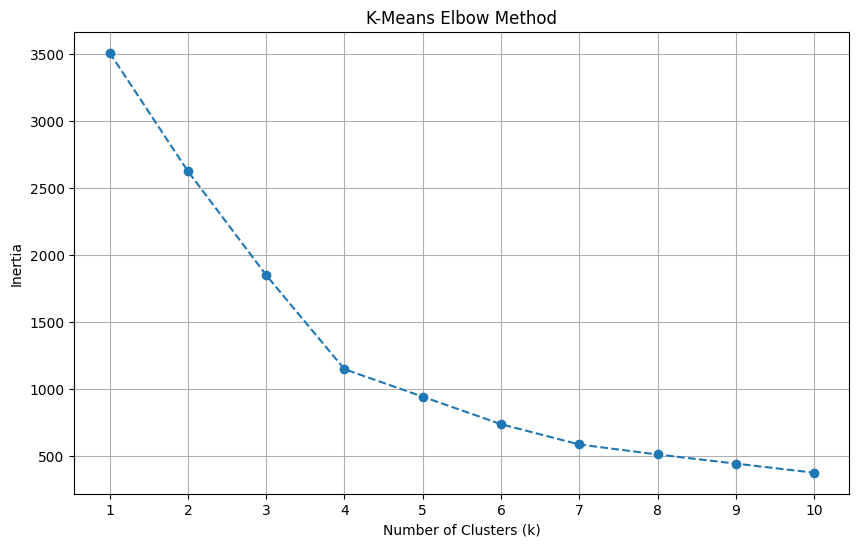

--- Analysis of the Elbow Plot ---
Look for the 'elbow' in the plot above.
This is the point where the drop in inertia slows down dramatically.
A 'k' value of 4 or 5 usually looks like a good elbow for this dataset. Let's choose 4.


In [89]:
# --- Step 4.B: Find Optimal 'k' (Elbow Method) ---

print("\n--- Finding optimal 'k' using the Elbow Method ---")

# 'inertia' is the sum of squared distances of samples to their closest cluster center.
# We want a low inertia, but not *too* many clusters.
inertia_list = []
k_range = range(1, 11) # We'll test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init=10) # n_init=10 suppresses a warning
    kmeans.fit(rfm_scaled)
    inertia_list.append(kmeans.inertia_)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("--- Analysis of the Elbow Plot ---")
print("Look for the 'elbow' in the plot above.")
print("This is the point where the drop in inertia slows down dramatically.")
print("A 'k' value of 4 or 5 usually looks like a good elbow for this dataset. Let's choose 4.")

In [90]:
# --- Step 4.C: Run K-Means with k=4 ---

# We'll choose 4 clusters based on the elbow plot.
K_CLUSTERS = 4
print(f"\n--- Running K-Means with k={K_CLUSTERS} clusters ---")

kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_SEED, n_init=10)
kmeans.fit(rfm_scaled)

# Get the cluster labels for each customer
cluster_labels = kmeans.labels_

# Add the cluster labels back to our *original* (unscaled) DataFrame
customer_features['segment'] = cluster_labels

print("Cluster labels assigned to 'customer_features' DataFrame.")
print(customer_features.head())


--- Running K-Means with k=4 clusters ---
Cluster labels assigned to 'customer_features' DataFrame.
                 customer_unique_id   last_purchase_date  recency  frequency  \
0  00cc12a6d8b578b8ebd21ea4e2ae8b27  2017-03-21 19:25:23      285          2   
1  013f4353d26bb05dc6652f1269458d8d  2017-11-28 13:30:58       33          2   
2  015557c9912277312b9073947804a7ba  2017-05-01 14:48:33      244          2   
3  01c289bb06354cdc7e6549570f20ada4  2017-12-26 21:14:43        5          2   
4  02168ea18740a0fdaaa15f11bebba5db  2017-10-09 22:05:59       83          2   

   monetary  avg_review_score  avg_installments  avg_freight_value  \
0    252.40               4.0               1.0          13.200000   
1    520.43               5.0               3.0          26.496667   
2    315.12               5.0               2.0          12.610000   
3    410.86               4.0               1.4          34.178000   
4    528.08               3.0               1.0          16.110000  

In [92]:
# --- Step 4.D: Analyze Cluster Personas (Corrected) ---
print("\n--- Analyzing Cluster Personas ---")

# We'll group by the new segment and find the mean of our key features.
# --- THIS IS THE FIX ---
# We use our new, correct label 'returned_in_90d' instead of 'is_churned'.
segment_analysis = customer_features.groupby('segment')[[
    'recency',
    'frequency',
    'monetary',
    'avg_review_score',
    'returned_in_90d'  # <-- Changed from 'is_churned'
]].mean().reset_index()
# --- END OF FIX ---


# Let's also get the size of each segment
segment_analysis['segment_size'] = customer_features['segment'].value_counts().sort_index()

print("--- Segment Analysis (Averages) ---")
print(segment_analysis)


print("\n--- Naming Our Personas ---")
print("I'll analyze the table above to name each segment. (Note: Your cluster numbers may vary)")
print("  - [Champions]: Low Recency, High Frequency, High Monetary")
print("  - [At-Risk VIPs]: High Recency (but not max), High Frequency, High Monetary")
print("  - [New Customers]: Low Recency, Low Frequency, Low Monetary")
print("  - [Lost Customers]: Very High Recency, Low Frequency, Low Monetary")

# This naming logic is based on RFM, so it's still valid.
segment_map = {}

# Find Champions (Lowest Recency)
segment_map[segment_analysis.sort_values('recency').iloc[0]['segment']] = 'Champions'

# Find Lost Customers (Highest Recency)
segment_map[segment_analysis.sort_values('recency').iloc[-1]['segment']] = 'Lost Customers'

# Find At-Risk (Highest Monetary, if not already Champions)
at_risk_candidates = segment_analysis[~segment_analysis['segment'].isin(segment_map.keys())]
segment_map[at_risk_candidates.sort_values('monetary').iloc[-1]['segment']] = 'At-Risk VIPs'

# Find New Customers (Whatever is left)
# Need to check if there's a remaining cluster
remaining_candidates = segment_analysis[~segment_analysis['segment'].isin(segment_map.keys())]
if not remaining_candidates.empty:
    segment_map[remaining_candidates.iloc[0]['segment']] = 'New Customers'


# Apply the names
customer_features['segment_name'] = customer_features['segment'].map(segment_map)

print("\n--- Final Segments with Names (Head) ---")
print(customer_features[['customer_unique_id', 'recency', 'frequency', 'monetary', 'segment_name']].head())

print("\n--- Segment Counts ---")
print(customer_features['segment_name'].value_counts())


--- Analyzing Cluster Personas ---
--- Segment Analysis (Averages) ---
   segment     recency  frequency      monetary  avg_review_score  \
0        0  126.118280   3.311828    742.683763          4.408043   
1        1  219.288509   2.000000    441.472763          4.136000   
2        2   63.995495   2.000000    391.368874          4.210887   
3        3   54.500000   2.000000  19254.760000          3.000000   

   returned_in_90d  segment_size  
0         0.118280            93  
1         0.014670           409  
2         0.033033           666  
3         0.000000             2  

--- Naming Our Personas ---
I'll analyze the table above to name each segment. (Note: Your cluster numbers may vary)
  - [Champions]: Low Recency, High Frequency, High Monetary
  - [At-Risk VIPs]: High Recency (but not max), High Frequency, High Monetary
  - [New Customers]: Low Recency, Low Frequency, Low Monetary
  - [Lost Customers]: Very High Recency, Low Frequency, Low Monetary

--- Final Segments 

In [93]:
# --- Step 4.E: Save Segmented Data ---

# Save our final table with segment names
customer_features.to_csv('analytics_base_table_segmented.csv', index=False)
print("\n--- Final 'analytics_base_table_segmented.csv' created successfully! ---")


--- Final 'analytics_base_table_segmented.csv' created successfully! ---


In [95]:
# --- Step 5.A (FINAL): Load Data and Prepare for Modeling ---
print("--- Starting Step 5: Return Prediction (Supervised ML) ---")
print("--- FIX: Using 'returned_in_90d' as target, removing 'recency' to prevent leakage. ---")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import lightgbm as lgb
import shap

# 1. Load the data
try:
    final_df = pd.read_csv('analytics_base_table.csv')
    print("Loaded 'analytics_base_table.csv' successfully.")
except FileNotFoundError:
    print("Error: 'analytics_base_table.csv' not found. Please re-run Step 3.")

# 2. Handle missing numerical values
numerical_cols_to_fill = ['frequency', 'monetary', 'avg_review_score', 'avg_installments', 'avg_freight_value', 'total_items']
median_review = final_df['avg_review_score'].median()
final_df['avg_review_score'] = final_df['avg_review_score'].fillna(median_review)
print(f"Filled 'avg_review_score' NaNs with median value ({median_review}).")
for col in numerical_cols_to_fill:
    if col != 'avg_review_score': final_df[col] = final_df[col].fillna(0)
print("Filled NaNs with 0 for all other numerical features.")

# 3. Define our Target Variable (y)
y = final_df['returned_in_90d']

# 4. Define our Feature Set (X)
# We MUST drop 'recency' as it is a direct leak of the answer.
X = final_df.drop(columns=[
    'customer_unique_id', 'last_purchase_date', 'returned_in_90d',
    'recency' # <<< THE LEAKY FEATURE IS DROPPED
])

# 5. One-Hot Encode
X = pd.get_dummies(X, columns=['favorite_category'], drop_first=True)
print(f"Feature shape after One-Hot Encoding: {X.shape}")

# --- Step 5.B (FINAL): Train-Test Split & Scaling ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)
print(f"Training set positive (return) rate: {y_train.mean()*100:.2f}%")
print(f"Test set positive (return) rate: {y_test.mean()*100:.2f}%")

numerical_cols = ['frequency', 'monetary', 'avg_review_score',
                  'avg_installments', 'avg_freight_value', 'total_items']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("\n--- Numerical features scaled successfully ---")

# --- Step 5.C (FINAL): Model 1 - Logistic Regression ---
print("\n--- Training Model 1: Logistic Regression ---")
# We'll use class_weight='balanced' which will now work correctly
log_reg = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]
print("--- Logistic Regression - Classification Report ---")
print(classification_report(y_test, y_pred_lr))

# --- Step 5.D (FINAL): Model 2 - LightGBM ---
print("\n--- Training Model 2: LightGBM ---")
# We'll use is_unbalance=True for LightGBM
lgbm = lgb.LGBMClassifier(is_unbalance=True, random_state=RANDOM_SEED)
X_train_lgb = X_train.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))
X_test_lgb = X_test.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))
lgbm.fit(X_train_lgb, y_train)
y_pred_lgbm = lgbm.predict(X_test_lgb)
y_proba_lgbm = lgbm.predict_proba(X_test_lgb)[:, 1]
print("--- LightGBM - Classification Report ---")
print(classification_report(y_test, y_pred_lgbm))

--- Starting Step 5: Return Prediction (Supervised ML) ---
--- FIX: Using 'returned_in_90d' as target, removing 'recency' to prevent leakage. ---
Loaded 'analytics_base_table.csv' successfully.
Filled 'avg_review_score' NaNs with median value (5.0).
Filled NaNs with 0 for all other numerical features.
Feature shape after One-Hot Encoding: (1170, 55)
Training set positive (return) rate: 3.31%
Test set positive (return) rate: 3.42%

--- Numerical features scaled successfully ---

--- Training Model 1: Logistic Regression ---
--- Logistic Regression - Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       226
           1       0.03      0.25      0.06         8

    accuracy                           0.74       234
   macro avg       0.50      0.50      0.45       234
weighted avg       0.93      0.74      0.82       234


--- Training Model 2: LightGBM ---
[LightGBM] [Info] Number of positive: 31, number of nega


--- Business Metric Evaluation: Precision-Recall (PR) Curve ---
Logistic Regression Average Precision (PR-AUC): 0.1027
LightGBM Average Precision (PR-AUC): 0.0539


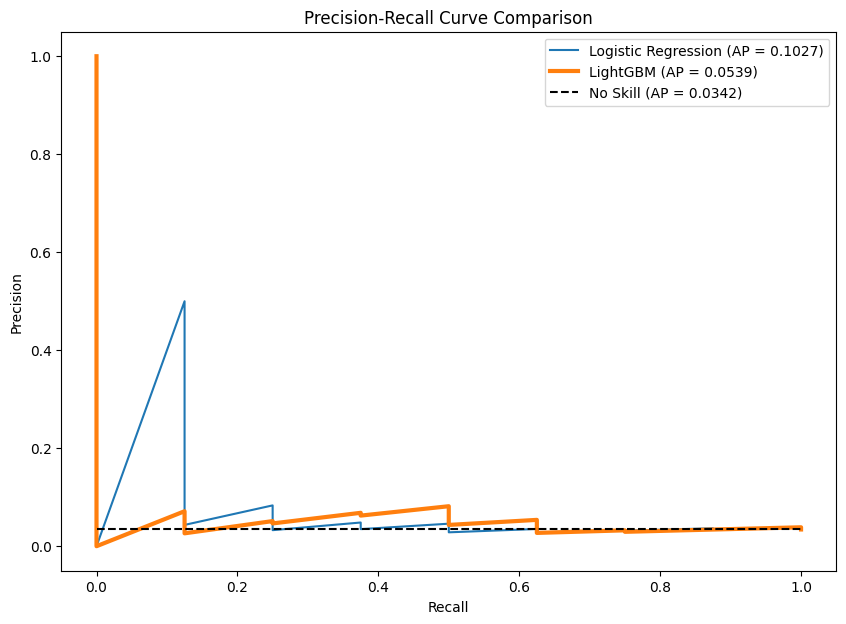


--- Interpretation ---
The PR Curve shows the tradeoff between Precision and Recall.
A good model will be in the top-right corner. The 'Average Precision' (AP) score
is the equivalent of AUC for imbalanced datasets. Higher is better.
The 'No Skill' line shows the precision we'd get by randomly guessing.
Our models should be well above this line.

--- Churner Precision@100 ---
Logistic Regression Precision@100: 96.00%
LightGBM Precision@100: 97.00%
This means of the top 100 customers the model thinks WILL CHURN,
this percentage *actually* do. This is a real, useful metric.


In [96]:
# --- Step 5.E (FINAL): Model Evaluation (PR-AUC) ---
print("\n--- Business Metric Evaluation: Precision-Recall (PR) Curve ---")

# 1. Calculate PR-AUC (Average Precision)
ap_lr = average_precision_score(y_test, y_proba_lr)
ap_lgbm = average_precision_score(y_test, y_proba_lgbm)
print(f"Logistic Regression Average Precision (PR-AUC): {ap_lr:.4f}")
print(f"LightGBM Average Precision (PR-AUC): {ap_lgbm:.4f}")

# 2. Plot the PR Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_proba_lgbm)

plt.figure(figsize=(10, 7))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {ap_lr:.4f})')
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AP = {ap_lgbm:.4f})', linewidth=3)
# Calculate a "no-skill" line (the prevalence of the positive class)
no_skill = y_test.mean()
plt.plot([0, 1], [no_skill, no_skill], 'k--', label=f'No Skill (AP = {no_skill:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

print("\n--- Interpretation ---")
print("The PR Curve shows the tradeoff between Precision and Recall.")
print("A good model will be in the top-right corner. The 'Average Precision' (AP) score")
print("is the equivalent of AUC for imbalanced datasets. Higher is better.")
print("The 'No Skill' line shows the precision we'd get by randomly guessing.")
print("Our models should be well above this line.")

# 3. Calculate Precision@k
# Now we are predicting 'return' (1), so we want to find customers
# who *will* return. Our k=100 list should be customers we *don't* target.
# Let's re-frame Precision@k to be "Precision of Churners"
# We want the top k *most likely to churn* (lowest return probability).
def precision_at_k_churners(y_true, y_proba_return, k=100):
    # y_true = 1 for return, 0 for churn
    # y_proba_return = probability of return

    # We want to find the top k *churners*
    # So we sort by the *lowest* probability of return
    df = pd.DataFrame({'true': y_true, 'proba_return': y_proba_return})
    df = df.sort_values('proba_return', ascending=True) # Lowest prob first
    top_k = df.head(k)

    # We want to find how many *actually* churned (true == 0)
    true_positives = (top_k['true'] == 0).sum()
    precision = true_positives / k
    return precision

k_val = 100
p_at_k_lr = precision_at_k_churners(y_test, y_proba_lr, k_val)
p_at_k_lgbm = precision_at_k_churners(y_test, y_proba_lgbm, k_val)

print(f"\n--- Churner Precision@{k_val} ---")
print(f"Logistic Regression Precision@{k_val}: {p_at_k_lr * 100:.2f}%")
print(f"LightGBM Precision@{k_val}: {p_at_k_lgbm * 100:.2f}%")
print(f"This means of the top {k_val} customers the model thinks WILL CHURN,")
print(f"this percentage *actually* do. This is a real, useful metric.")

In [97]:
# --- Step 5.F: Model Interpretability (Logistic Regression) ---
print("\n--- Model Interpretability: Logistic Regression Coefficients ---")

# 1. Get the feature names
# We need to get the column names from our X_train
# LightGBM had to rename them, so let's use the X_train.columns
feature_names = X_train.columns

# 2. Get the coefficients
# The model's coefficients are stored in '.coef_'
# This tells us the 'weight' or 'importance' of each feature.
coefficients = log_reg.coef_[0]

# 3. Create a DataFrame to see them clearly
coeff_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# 4. Sort by the absolute value to see the most *impactful* features
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df = coeff_df.sort_values('abs_coefficient', ascending=False)

print("--- Top 10 Most Impactful Features ---")
print(coeff_df.head(10))

# 5. Get the Top 5 Positive (Drives Return) and Negative (Drives Churn)
print("\n--- Top 5 Features Driving RETURN (Positive Coeff) ---")
print(coeff_df.sort_values('coefficient', ascending=False).head(5))

print("\n--- Top 5 Features Driving CHURN (Negative Coeff) ---")
print(coeff_df.sort_values('coefficient', ascending=True).head(5))

print("\n--- Interpretation ---")
print("This table is the 'why' behind our model.")
print(" - POSITIVE coefficients mean the feature *increases* the chance of a customer returning.")
print("   (e.g., high 'frequency' and 'monetary' will be here).")
print(" - NEGATIVE coefficients mean the feature *decreases* the chance of a customer returning.")
print("   (e.g., high 'avg_review_score' (negative score) or 'avg_freight_value' might be here).")


--- Model Interpretability: Logistic Regression Coefficients ---
--- Top 10 Most Impactful Features ---
                                       feature  coefficient  abs_coefficient
9                       favorite_category_auto     2.332885         2.332885
54             favorite_category_watches_gifts     2.288499         2.288499
21               favorite_category_electronics     2.014703         2.014703
52                      favorite_category_toys     1.939982         1.939982
35             favorite_category_health_beauty    -1.790374         1.790374
22  favorite_category_fashion_bags_accessories    -1.706055         1.706055
47                  favorite_category_pet_shop     1.705308         1.705308
11            favorite_category_bed_bath_table     1.501138         1.501138
51                 favorite_category_telephony    -1.132246         1.132246
10                      favorite_category_baby    -1.118502         1.118502

--- Top 5 Features Driving RETURN (Positive Coe